<a href="https://colab.research.google.com/github/Ivette-GR/Amazon/blob/main/Amazon_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificar la ruta del archivo en Google Drive
file_path = '/content/drive/My Drive/Proyecto 4/product.csv'

# Si prefieres cargar el archivo directamente en Colab, puedes usar el siguiente código en lugar de montar Google Drive
# uploaded = files.upload()
# file_name = list(uploaded.keys())[0]

# Importar las bibliotecas necesarias
import pandas as pd

# Leer el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [ ]:
#Changing the data type of discounted price and actual price

df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

In [ ]:
#Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

df['discount_percentage']

0       0.64
1       0.43
2       0.90
3       0.53
4       0.61
        ... 
1464    0.22
1465    0.25
1466    0.28
1467    0.26
1468    0.22
Name: discount_percentage, Length: 1469, dtype: float64

In [ ]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,High Compatibility : Compatible With iPhone 12...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,"Compatible with all Type C enabled devices, be..."
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,【 Fast Charger& Data Sync】-With built-in safet...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,The boAt Deuce USB 300 2 in 1 cable is compati...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,[CHARGE & SYNC FUNCTION]- This cable comes wit...


In [ ]:
!pip install google-cloud-bigquery pandas

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación con Google Cloud
auth.authenticate_user()

# Configuración del cliente de BigQuery
project_id = 'amazon-sales-410622'  # Reemplaza con tu ID de proyecto
client = bigquery.Client(project=project_id)

# Reemplaza 'nombre_de_tabla' con el nombre que deseas para la tabla en BigQuery
table_id = 'amazon-sales-410622.pruebas.product'

# DataFrame que deseas exportar (reemplaza esto con tu propio DataFrame)
# Puedes cargar tu DataFrame directamente en lugar de crear uno de ejemplo
# Asumiendo que tu DataFrame se llama 'tu_dataframe_real'
df = df  # Reemplaza 'tu_dataframe_real' con tu DataFrame real

# Exportar DataFrame a BigQuery
job_config = bigquery.LoadJobConfig(write_disposition="WRITE_TRUNCATE")
job = client.load_table_from_dataframe(df, table_id, job_config=job_config)
job.result()  # Espera a que se complete el trabajo

print(f"DataFrame exportado a BigQuery: {table_id}")

DataFrame exportado a BigQuery: amazon-sales-410622.pruebas.product


In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
!pip install emoji
!pip install tensorflow
!pip install keras
!pip install nltk
from google.cloud import bigquery
from google.colab import auth

auth.authenticate_user()

# Especifica el ID del proyecto
project_id = 'amzon-411119'
client = bigquery.Client(project=project_id)

# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `amzon-411119.pruebas.union_tablas`'

# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df1 = client.query(query).to_dataframe()

# Imprime el DataFrame
print(df1.head())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.8 MB/s eta 0:00:00
   product_id                                       product_name  \
0  B07R99NBVB  Gizga Essentials Cable Organiser, Cord Managem...   
1  B0912WJ87V  Reffair AX30 [MAX] Portable Air Purifier for C...   
2  B07G3YNLJB  Crucial BX500 240GB 3D NAND SATA 6.35 cm (2.5-...   
3  B00DJ5N9VK  Faber-Castell Connector Pen Set - Pack of 25 (...   
4  B01LWYDEQ7  Pigeon Polypropylene Mini Handy and Compact Ch...   

                category    sub_category  discounted_price  actual_price  \
0        HomeImprovement      Electrical             249.0         599.0   
1          Car&Motorbike  CarAccessories            2339.0        4000.0   
2  Computers&Accessories      Components            1815.0        3100.0   
3             Toys&Games     Arts&Crafts             150.0         150.0   
4           Home&Kitchen  Kitchen&Dining             199.0         495.0   

   discount_percentage                              

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1351 non-null   object 
 1   product_name         1351 non-null   object 
 2   category             1351 non-null   object 
 3   sub_category         1351 non-null   object 
 4   discounted_price     1351 non-null   float64
 5   actual_price         1351 non-null   float64
 6   discount_percentage  1351 non-null   float64
 7   about_product        1351 non-null   object 
 8   user_id              1351 non-null   object 
 9   user_name            1351 non-null   object 
 10  review_id            1351 non-null   object 
 11  review_title         1351 non-null   object 
 12  review_content       1351 non-null   object 
 13  img_link             1351 non-null   Int64  
 14  product_link         1351 non-null   Int64  
 15  rating               1351 non-null   f

In [ ]:
df1.describe()

,discounted_price,actual_price,discount_percentage,img_link,product_link,rating,rating_count
count,1351.000000,1351.000000,1351.000000,1351.0,1351.0,1351.00000,1351.0
mean,3304.809896,5690.510452,0.466788,0.659511,0.659511,4.09171,17618.373797
std,7173.981762,11218.918302,0.216212,0.474049,0.474049,0.29738,42119.882419
min,39.000000,39.000000,0.000000,0.0,0.0,2.00000,0.0
25%,349.000000,899.000000,0.310000,0.0,0.0,3.90000,1094.5
50%,899.000000,1790.000000,0.490000,1.0,1.0,4.10000,4736.0
75%,2174.000000,4575.000000,0.620000,1.0,1.0,4.30000,15995.0
max,77990.000000,139900.000000,0.940000,1.0,1.0,5.00000,426973.0


In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage
count,1469.000000,1469.000000,1469.000000
mean,3122.764758,5438.132253,0.476304
std,6935.061749,10860.847741,0.216383
min,39.000000,39.000000,0.000000
25%,325.000000,800.000000,0.320000
50%,799.000000,1690.000000,0.500000
75%,1999.000000,4295.000000,0.630000
max,77990.000000,139900.000000,0.940000


In [ ]:
!pip install emoji
!apt install libbz2-dev
!apt install python3-emoji
!pip install nltk
!pip install twython
!pip install wordnet

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libbz2-dev is already the newest version (1.0.8-5build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-emoji is already the newest version (1.2.0-2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
  Preparing metadata (setup.py) ... done
  Created wheel for wordnet: filename=wordnet-0.0.1b2-py3-none-any.whl size=10500 sha256=3d190a87c39cf09703d1604da5f42ed85637f70e9662b828eab30823005021f3
  Stored in directory: /root/.cache/pip/wheels/c0/a1/e8/4649c8712033dcdbd1e64a0fc75216a5d1769665852c36b4f9
Successfully built wordnet


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import emoji, bz2
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

limpieza de texto

In [ ]:
def clean_text(df, review_content, clean_col):
    df1[clean_col] = df[review_content].str.replace(r"@"," at ")
    df1[clean_col] = df[clean_col].str.replace("#[^a-zA-Z0-9_]+"," ")
    df1[clean_col] = df[clean_col].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df1[clean_col] = df[clean_col].str.replace(r"http\S+","")
    df1[clean_col] = df[clean_col].str.lower()
    return df1

clean_text(df1,"review_content", "review_content_clean")

,product_id,product_name,category,sub_category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating,rating_count,review_content_clean
0,B07R99NBVB,"Gizga Essentials Cable Organiser, Cord Managem...",HomeImprovement,Electrical,249.0,599.0,0.58,Gizga Essentials Reusable Cable Ties are reusa...,"AEG6NCZPUEEC3YY267IS3YMFRBWA,AE3S562OZDGHRXCXE...",DhineshkumarAmazon CustomerAnkit Kumar SinghPr...,"R3L1T1SL8IC3UH,R250EC6F25GMQ2,R394W20XOQRZP5,R...",Very useful product to organize cableGreat but...,I have lot of cables running between my Sounds...,1,1,4.5,5985,i have lot of cables running between my sounds...
1,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike,CarAccessories,2339.0,4000.0,0.42,NEW LAUNCH INNOVATIVE DESIGN EFFICIENT PURIFI...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...",ArivazhaganAjitswanand panditVenkatesh SShubha...,"R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...",Liked itUser friendly and effectiveNot as per ...,"As of now its working fine, but don't expect m...",0,0,3.8,1118,"as of now its working fine, but don't expect m..."
2,B07G3YNLJB,Crucial BX500 240GB 3D NAND SATA 6.35 cm (2.5-...,Computers&Accessories,Components,1815.0,3100.0,0.41,GB inch internal SSD SATA Gbs with blistering ...,"AGHW3JDEF6JIRC4HB43UDMKOFXZQ,AF4N3Q6OEXVBSAHPK...",Shaikh FaisalSISODIYA NANUBHAIAaryan JagtapMr ...,"R34WAR6NQSVZBI,RGG00MCOD3B6A,R2RO4Z1CBF2G1I,R1...",Absolutely worth the priceBest product on low ...,After I changed from my slow 500gb HDD to this...,1,1,4.5,92925,after i changed from my slow gb hdd to this...
3,B00DJ5N9VK,Faber-Castell Connector Pen Set - Pack of 25 (...,Toys&Games,Arts&Crafts,150.0,150.0,0.00,Simply draw and color or clip these pens toget...,"AE5D3EMPETKIA4VU4SZU5UIHXKQA,AFF76KWKCMR6GNPUX...",Aradhna Aadhyasonali ghoshSamVGRKSurferLovelyA...,"R39PYNXMLNEIYW,R3AMNR0LJWNAUU,R2P5M80U8OL9OQ,R...",As this was my nd order for same productnd tim...,Torn packing.dekhne me product used lg rha tha...,1,1,4.3,15867,torn packing dekhne me product used lg rha tha...
4,B01LWYDEQ7,Pigeon Polypropylene Mini Handy and Compact Ch...,Home&Kitchen,Kitchen&Dining,199.0,495.0,0.60,Unique string function to chop vegetables and ...,"AGJTPXSZDYEWZM76UMJXCHUUPJSQ,AH4ON4ZDRHM5PWVW6...",HarshitFazeelaChiranjiv SinghJoseph KaRohit Ka...,"R284SZGRNQQXYS,R3O2GOW05S3YSF,R28FXK3KNQP51T,R...",Nice chopperSmall easy use n cleanNot goodGood...,"1st product came faulty got it replaced , repl...",0,0,4.1,270563,"st product came faulty got it replaced , repl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,B014SZPBM4,"Duracell Ultra Alkaline D Battery, 2 Pcs",Electronics,GeneralPurposeBatteries&BatteryChargers,380.0,400.0,0.05,Long Lasting Power GuaranteedOur best battery ...,"AEGQJH2NIAS54T7WKAHKVEO4B67A,AFDH4NWAAHAVKPQVB...",Md asif akhterKIRAN THanuman sardaPranav Chaud...,"R1RXFMVZ8EKN3Q,R2YX4PL3F59OHC,RUDJ9ISAQDD3B,R3...",BatteryGood buyBigger than expectedBest Batter...,"Duracell never disappoint you,Good,https://m.m...",0,0,4.4,2111,"duracell never disappoint you,good, m media ..."
1347,B08Y57TPDM,"Duracell CR2016 3V Lithium Coin Battery, 5 pcs...",Electronics,GeneralPurposeBatteries&BatteryChargers,116.0,200.0,0.42,Duracell lithium coin batteries are suitable ...,"AG6WNF3AQBACEWDTRW6UM2MALT2A,AGDX3YMAIQMEVYPEJ...",SurajnileshPawanDeepak Singhnikhil chaudharyVi...,"RKDNXHI6GT6UZ,R2665SN6A29V01,R2J30R8O3UHZRI,R3...",Good product batiCharge seems to be very lowG...,"👌,1 bati , 5 bati,Voltage and performance is n...",1,1,4.3,485,", bati , bati,voltage and performance is n..."
1348,B015ZXUDD0,"Duracell Rechargeable AA 1300mAh Batteries, 4Pcs",Electronics,GeneralPurposeBatteries&BatteryChargers,479.0,599.0,0.20,Duracell Rechargeable AA mAh batteries stay ch...,"AE3PTJFRVU3YM5YFYN3ICDA5X6FA,AGF5DMXE65QXZPJX6...",Rameez KhanSidhdharthDaljeet Singh kangRam Gop...,"R32VTB32ABV5KD,R6MP

In [ ]:
import re
import emoji
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
i = 0

def preprocess_text(text):
    global i
    if i % 100 == 0:
        print(i)
    i += 1
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    text = emoji.demojize(text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

df1["review_content_clean"] = df1["review_content_clean"].apply(preprocess_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


In [ ]:
df2=df1[['product_id', 'review_title','review_content_clean']]

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
#Running the polarity Score on the entire dataset
res = {}

for i, row in tqdm(df2.iterrows(), total=len(df2)):
    review_desc =row['review_content_clean']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(review_desc)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/1351 [00:00<?, ?it/s]

In [ ]:
pol_score = pd.DataFrame(res).T
pol_score = pol_score.reset_index().rename(columns={'index' : 'product_id'})

pol_score

,product_id,neg,neu,pos,compound
0,B07R99NBVB,0.040,0.626,0.334,0.9951
1,B0912WJ87V,0.074,0.556,0.370,0.9888
2,B07G3YNLJB,0.041,0.747,0.212,0.9919
3,B00DJ5N9VK,0.036,0.591,0.373,0.9916
4,B01LWYDEQ7,0.063,0.530,0.407,0.9876
...,...,...,...,...,...
1346,B014SZPBM4,0.082,0.712,0.206,0.8762
1347,B08Y57TPDM,0.000,0.737,0.263,0.9645
1348,B015ZXUDD0,0.079,0.689,0.233,0.9802
1349,B07Q7561HD,0.068,0.471,0.461,0.9324


In [ ]:
#Merging the Dataframe with Polarity Score

df3 = df1.merge(pol_score, how='left')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1350
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1351 non-null   object 
 1   product_name          1351 non-null   object 
 2   category              1351 non-null   object 
 3   sub_category          1351 non-null   object 
 4   discounted_price      1351 non-null   float64
 5   actual_price          1351 non-null   float64
 6   discount_percentage   1351 non-null   float64
 7   about_product         1351 non-null   object 
 8   user_id               1351 non-null   object 
 9   user_name             1351 non-null   object 
 10  review_id             1351 non-null   object 
 11  review_title          1351 non-null   object 
 12  review_content        1351 non-null   object 
 13  img_link              1351 non-null   Int64  
 14  product_link          1351 non-null   Int64  
 15  rating               

In [ ]:
df3.describe()

,discounted_price,actual_price,discount_percentage,img_link,product_link,rating,rating_count,neg,neu,pos,compound
count,1351.000000,1351.000000,1351.000000,1351.0,1351.0,1351.00000,1351.0,1351.000000,1351.000000,1351.000000,1351.000000
mean,3304.809896,5690.510452,0.466788,0.659511,0.659511,4.09171,17618.373797,0.053284,0.590726,0.355984,0.952048
std,7173.981762,11218.918302,0.216212,0.474049,0.474049,0.29738,42119.882419,0.045923,0.099458,0.110557,0.154454
min,39.000000,39.000000,0.000000,0.0,0.0,2.00000,0.0,0.000000,0.157000,0.000000,-0.752300
25%,349.000000,899.000000,0.310000,0.0,0.0,3.90000,1094.5,0.023000,0.531500,0.274000,0.967400
50%,899.000000,1790.000000,0.490000,1.0,1.0,4.10000,4736.0,0.047000,0.600000,0.346000,0.984600
75%,2174.000000,4575.000000,0.620000,1.0,1.0,4.30000,15995.0,0.075500,0.664000,0.422000,0.992700
max,77990.000000,139900.000000,0.940000,1.0,1.0,5.00000,426973.0,0.557000,0.900000,0.773000,0.999900


from matplotlib import pyplot as plt
_df_0['discounted_price'].plot(kind='hist', bins=20, title='discounted_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['actual_price'].plot(kind='hist', bins=20, title='actual_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['discount_percentage'].plot(kind='hist', bins=20, title='discount_percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['img_link'].plot(kind='hist', bins=20, title='img_link')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='discounted_price', y='actual_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='actual_price', y='discount_percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='discount_percentage', y='img_link', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='img_link', y='product_link', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['discounted_price'].plot(kind='line', figsize=(8, 4), title='discounted_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['actual_price'].plot(kind='line', figsize=(8, 4), title='actual_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['discount_percentage'].plot(kind='line', figsize=(8, 4), title='discount_percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['img_link'].plot(kind='line', figsize=(8, 4), title='img_link')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df3.head()

,product_id,product_name,category,sub_category,discounted_price,actual_price,discount_percentage,about_product,user_id,user_name,...,review_content,img_link,product_link,rating,rating_count,review_content_clean,neg,neu,pos,compound
0,B07R99NBVB,"Gizga Essentials Cable Organiser, Cord Managem...",HomeImprovement,Electrical,249.0,599.0,0.58,Gizga Essentials Reusable Cable Ties are reusa...,"AEG6NCZPUEEC3YY267IS3YMFRBWA,AE3S562OZDGHRXCXE...",DhineshkumarAmazon CustomerAnkit Kumar SinghPr...,...,I have lot of cables running between my Sounds...,1,1,4.5,5985,lot cable running soundsystem settop box tv ro...,0.040,0.626,0.334,0.9951
1,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike,CarAccessories,2339.0,4000.0,0.42,NEW LAUNCH INNOVATIVE DESIGN EFFICIENT PURIFI...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...",ArivazhaganAjitswanand panditVenkatesh SShubha...,...,"As of now its working fine, but don't expect m...",0,0,3.8,1118,working fine expect like dust remove effective...,0.074,0.556,0.370,0.9888
2,B07G3YNLJB,Crucial BX500 240GB 3D NAND SATA 6.35 cm (2.5-...,Computers&Accessories,Components,1815.0,3100.0,0.41,GB inch internal SSD SATA Gbs with blistering ...,"AGHW3JDEF6JIRC4HB43UDMKOFXZQ,AF4N3Q6OEXVBSAHPK...",Shaikh FaisalSISODIYA NANUBHAIAaryan JagtapMr ...,...,After I changed from my slow 500gb HDD to this...,1,1,4.5,92925,changed slow gb hdd ssd feel like living stone...,0.041,0.747,0.212,0.9919
3,B00DJ5N9VK,Faber-Castell Connector Pen Set - Pack of 25 (...,Toys&Games,Arts&Crafts,150.0,150.0,0.00,Simply draw and color or clip these pens toget...,"AE5D3EMPETKIA4VU4SZU5UIHXKQA,AFF76KWKCMR6GNPUX...",Aradhna Aadhyasonali ghoshSamVGRKSurferLovelyA...,...,Torn packing.dekhne me product used lg rha tha...,1,1,4.3,15867,torn packing dekhne product used lg rha tha bo...,0.036,0.591,0.373,0.9916
4,B01LWYDEQ7,Pigeon Polypropylene Mini Handy and Compact Ch...,Home&Kitchen,Kitchen&Dining,199.0,495.0,0.60,Unique string function to chop vegetables and ...,"AGJTPXSZDYEWZM76UMJXCHUUPJSQ,AH4ON4ZDRHM5PWVW6...",HarshitFazeelaChiranjiv SinghJoseph KaRohit Ka...,...,"1st product came faulty got it replaced , repl...",0,0,4.1,270563,st product came faulty got replaced replacemen...,0.063,0.530,0.407,0.9876


                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.962267            -0.236517   
actual_price                 0.962267      1.000000            -0.111830   
discount_percentage         -0.236517     -0.111830             1.000000   
img_link                     0.090534      0.090635             0.199195   
product_link                 0.090534      0.090635             0.199195   
rating                       0.126418      0.127212            -0.160770   
rating_count                -0.023811     -0.034191             0.003356   
neg                          0.101437      0.088707            -0.033660   
neu                          0.146489      0.145771            -0.035661   
pos                         -0.173992     -0.168125             0.046087   
compound                     0.031068      0.030902            -0.016683   

                     img_link  product_link    rating  rating_count       neg  \
discou

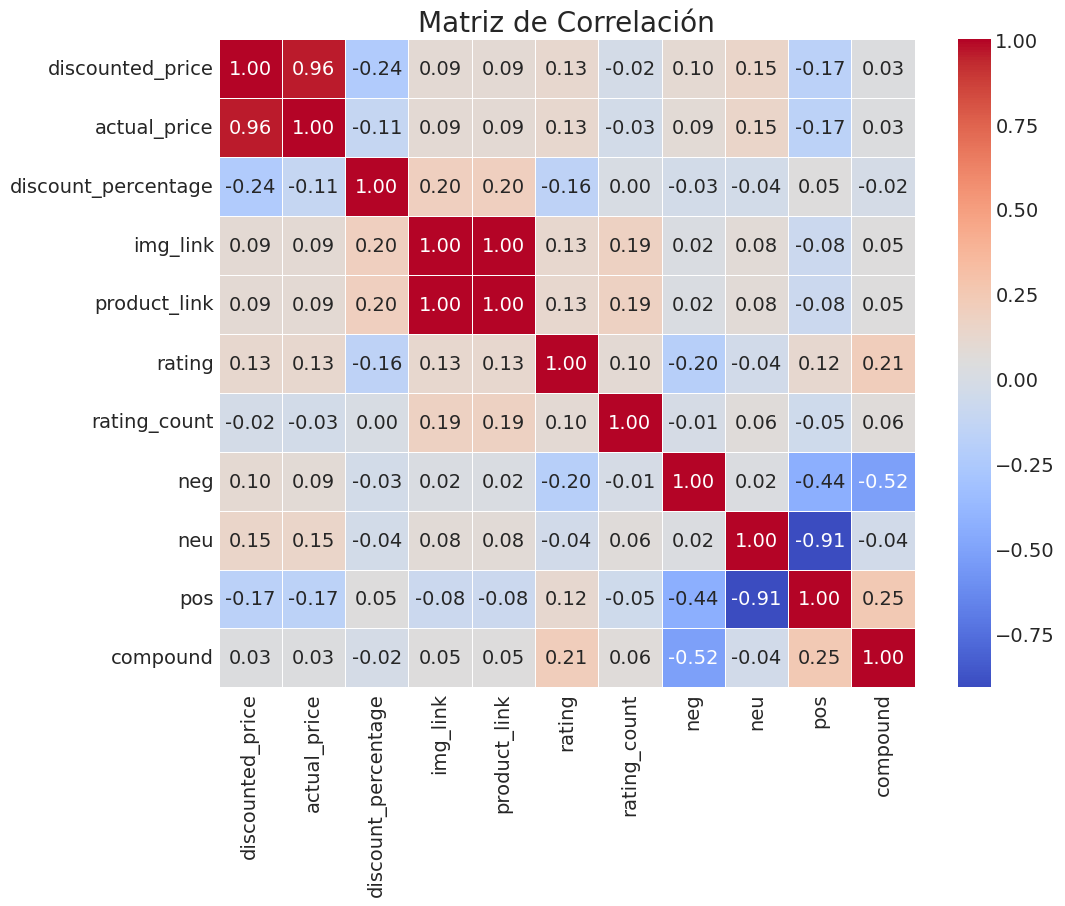

In [ ]:
# Calcula la matriz de correlación
correlation_matrix = df3.corr()

# Muestra la matriz de correlación
print(correlation_matrix)

# Crea un mapa de calor usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

La prueba de t fisher transformada Hipotesis (2) aceptada
A medida que la polaridad general del texto de las reseñas de un producto, medida por el valor compound, aumenta, el número de personas que votan por la calificación de Amazon tiende a aumentar de manera significativa, indicando que hay una relación positiva entre la polaridad del texto y la participación de los usuarios en la votación.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
# Calcula la correlación de Pearson y realiza la prueba de significancia
r, p_value = pearsonr(df3['compound'], df3['rating_count'])

# Imprime los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: 0.06240999314717327
Valor p: 0.021787519182381702
Se rechaza la hipótesis nula. Hay una correlación significativa.


Hipotesis 1 se acepta Existe una relación entre el descuento y la puntuación.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
# Calcula la correlación de Pearson y realiza la prueba de significancia
r, p_value = pearsonr(df3['discount_percentage'], df3['rating'])

# Imprime los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: -0.16076983052576685
Valor p: 2.8075394752223675e-09
Se rechaza la hipótesis nula. Hay una correlación significativa.


Hipotesis 3 Existe una relación significativa entre la positividad del comentario y la puntuación asociada.

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
# Calcula la correlación de Pearson y realiza la prueba de significancia
r, p_value = pearsonr(df3['compound'], df3['rating'])

# Imprime los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: 0.21068609612304628
Valor p: 5.085049420836193e-15
Se rechaza la hipótesis nula. Hay una correlación significativa.


Hipotesis 4 No hay ninguna relación significativa entre el nivel de descuento y la intensidad del sentimiento positivo

In [ ]:
import pandas as pd
from scipy.stats import pearsonr
# Calcula la correlación de Pearson y realiza la prueba de significancia
r, p_value = pearsonr(df3['discount_percentage'], df3['compound'])

# Imprime los resultados
print(f"Correlación de Pearson: {r}")
print(f"Valor p: {p_value}")

# Comparar con un umbral de significancia (por ejemplo, 0.05)
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay una correlación significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

Correlación de Pearson: -0.016682893881039655
Valor p: 0.5400941095005249
No hay suficiente evidencia para rechazar la hipótesis nula.


Hipotesis 4 Regresion lineal

Error Cuadrático Medio en el conjunto de prueba: 0.014888403758662828


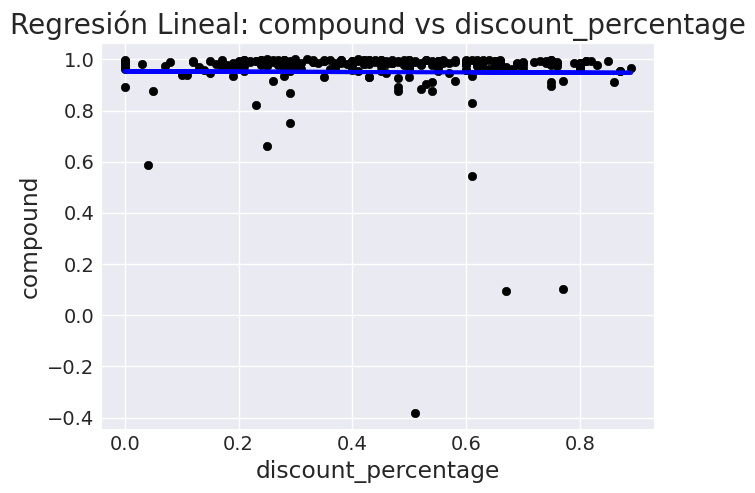

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que df es tu DataFrame con los datos desde BigQuery
# Puedes cargar los datos de BigQuery a un DataFrame así:
# df = pd.read_gbq("SELECT * FROM tu_tabla", project_id="tu_proyecto")

# Seleccionar las variables de interés
df4 = df3[['compound', 'discount_percentage']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df4[['discount_percentage']]
y = df4['compound']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('discount_percentage')
plt.ylabel('compound')
plt.title('Regresión Lineal: compound vs discount_percentage')
plt.show()

Intersección (Intercept): 0.9530814136791074. Esto representa el valor estimado de la variable dependiente (compound) cuando la variable independiente (discount_percentage) es igual a cero. En este contexto, significa que cuando el descuento es cero, se espera que la puntuación (compound) sea aproximadamente 0.9531.

Pendiente (Slope o Coeficiente): -0.006225904612525334. Esto indica el cambio esperado en la variable dependiente (compound) por cada unidad de cambio en la variable independiente (discount_percentage). En este caso, la pendiente es negativa, lo que sugiere que hay una relación decreciente entre el descuento y la puntuación. En términos más simples, a medida que el descuento aumenta, se espera que la puntuación disminuya en aproximadamente 0.0062.

Entonces, la interpretación general de estos coeficientes sería que hay una relación negativa entre el descuento y la puntuación. Un mayor descuento está asociado con una puntuación ligeramente más baja en las reseñas (compound).

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print(f"Coeficiente: {coefficients[0]}")

# También puedes imprimir la intersección y la pendiente
print(f"Intersección: {model.intercept_}")
print(f"Pendiente: {model.coef_[0]}")

Coeficiente: -0.006225904612525334
Intersección: 0.9530814136791074
Pendiente: -0.006225904612525334


Interpretacion del gráfico Q-Q (Quantile-Quantile)los puntos se alejan de la línea en los extremos, podría indicar desviaciones de la normalidad en esos extremos.Si hay curvatura en los extremos, podría indicar colas más pesadas o ligeras que la distribución normal. Pueden ocurrir en situaciones en las que hay valores atípicos o eventos inusuales.

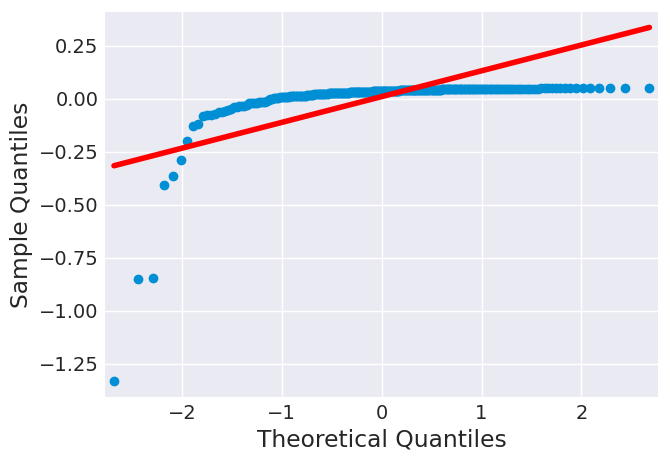

In [ ]:
#verifica ka normalidad de los residuos
#gráfico Q-Q (Quantile-Quantile) plot compara la distribución de los residuos con la distribución teórica normal
residuals = y_test - y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

**Hipotesis 1.**
El modelo de Regresion  Lineal si esta interpretando bien, es decir las predicciones estan cercanas a los valores reales

Error Cuadrático Medio en el conjunto de prueba: 0.0806316084970344


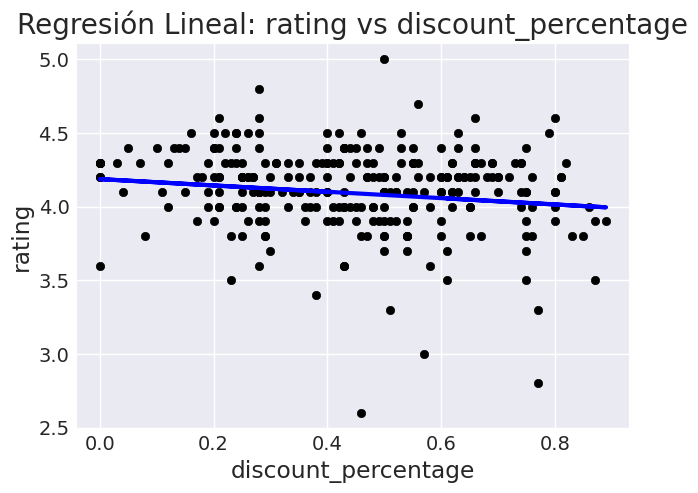

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que df es tu DataFrame con los datos desde BigQuery
# Puedes cargar los datos de BigQuery a un DataFrame así:
# df = pd.read_gbq("SELECT * FROM tu_tabla", project_id="tu_proyecto")

# Seleccionar las variables de interés
df5 = df3[['rating', 'discount_percentage']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df5[['discount_percentage']]
y = df5['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('discount_percentage')
plt.ylabel('rating')
plt.title('Regresión Lineal: rating vs discount_percentage')
plt.show()

Intersección (Intercept): 4.187606470447239. Esto indica el valor estimado de la calificación cuando el descuento es cero. En este contexto, se esperaría que la calificación sea aproximadamente 4.19 cuando no hay descuento. Puedes interpretarlo como la "calificación base" en ausencia de descuento. Pendiente (Slope o Coeficiente): -0.2152014058485512. Este valor indica el cambio esperado en la calificación por cada unidad de cambio en el descuento. Sin embargo, que tu hipótesis sugiere que un mayor descuento se asocia con una mejor calificación, la interpretación se ajustaría de la siguiente manera: por cada punto porcentual de aumento en el descuento, se espera un aumento promedio en la calificación de alrededor de 0.22.

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print(f"Coeficiente: {coefficients[0]}")

# También puedes imprimir la intersección y la pendiente
print(f"Intersección: {model.intercept_}")
print(f"Pendiente: {model.coef_[0]}")

Coeficiente: -0.2152014058485512
Intersección: 4.187606470447239
Pendiente: -0.2152014058485512


Interpretacion del grafico Q-Q Indican que los residuos se ajustan bien a una distribución normal.

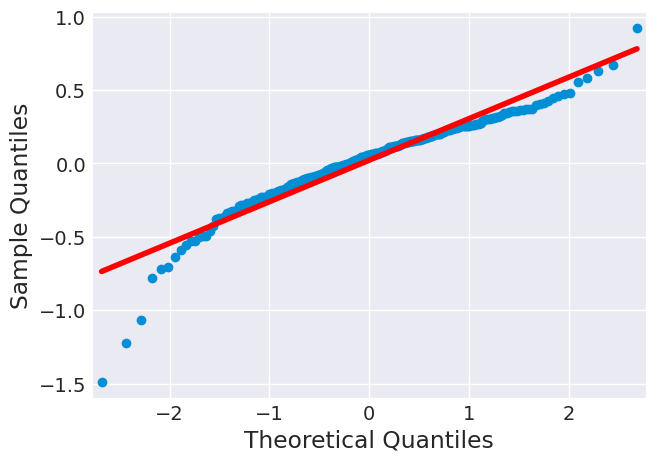

In [ ]:
#indica la normalidad de los residuos
#gráfico Q-Q (Quantile-Quantile) plot compara la distribución de los residuos con la distribución teórica normal
residuals = y_test - y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

**Hipotesis 2**
El modelo de Regresion lineal tiene un Erros cuadratico bastante alto, indicando que las predicciones del modelo están bastante alejadas de los valores reales en el conjunto de prueba.

Error Cuadrático Medio en el conjunto de prueba: 2057736440.2606628


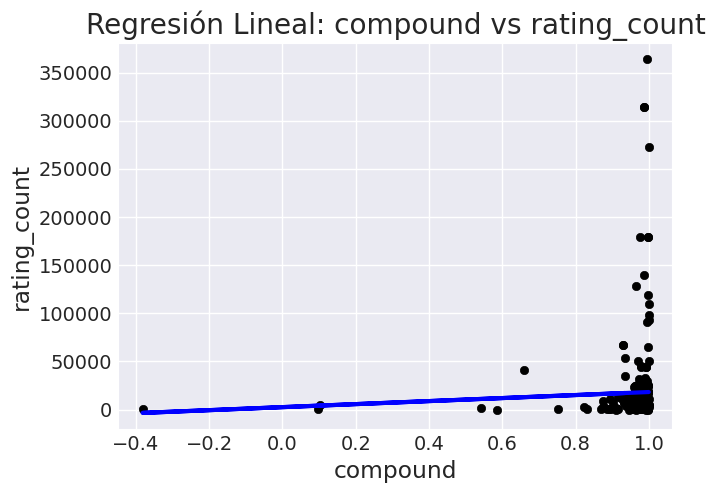

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que df es tu DataFrame con los datos desde BigQuery
# Puedes cargar los datos de BigQuery a un DataFrame así:
# df = pd.read_gbq("SELECT * FROM tu_tabla", project_id="tu_proyecto")

# Seleccionar las variables de interés
df6 = df3[['compound', 'rating_count']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df6[['compound']]
y = df6['rating_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('compound')
plt.ylabel('rating_count')
plt.title('Regresión Lineal: compound vs rating_count')
plt.show()

Intersección (Intercept): 2484.9360846645104. Esto indica el valor estimado de la cantidad de calificaciones cuando el valor de compound es cero, pero interpretar la intersección en el contexto de un MSE alto sugiere que el modelo no está prediciendo bien los valores.

Pendiente (Slope o Coeficiente): 15704.6648222073. Este valor indica el cambio esperado en la cantidad de calificaciones por cada unidad de cambio en compound. **La alta magnitud de este coeficiente podría indicar una relación fuerte**, pero el MSE sugiere que las predicciones no están siendo precisas.

Dado el MSE alto, es posible que haya otros factores o patrones en los datos que no estén siendo capturados adecuadamente por la relación lineal entre compound y rating_count. Se puede considerar explorar otras técnicas de modelado o investigar la posibilidad de que la relación entre estas variables no sea lineal.

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print(f"Coeficiente: {coefficients[0]}")

# También puedes imprimir la intersección y la pendiente
print(f"Intersección: {model.intercept_}")
print(f"Pendiente: {model.coef_[0]}")

Coeficiente: 15704.6648222073
Intersección: 2484.9360846645104
Pendiente: 15704.6648222073


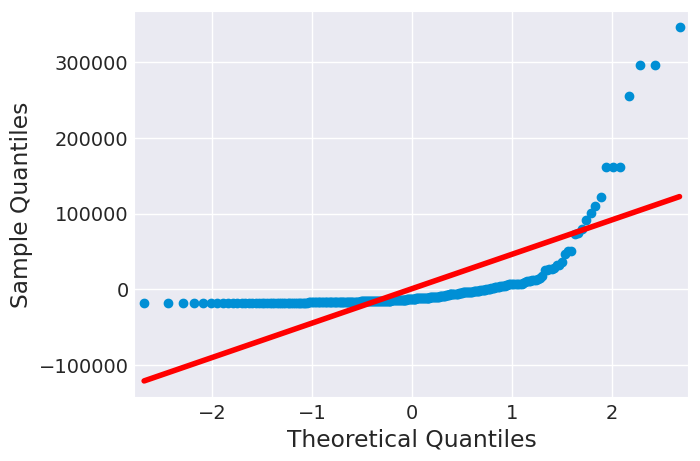

In [ ]:
#indica la normalidad de los residuos
#gráfico Q-Q (Quantile-Quantile) plot compara la distribución de los residuos con la distribución teórica normal
residuals = y_test - y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

Regresión Polinómica: En lugar de ajustar una línea recta, se pueden usar polinomios de grado superior para capturar relaciones no lineales.Observa si hay patrones en el gráfico de residuos. Un patrón en forma de U o una curva podrían sugerir una relación no lineal no capturada.

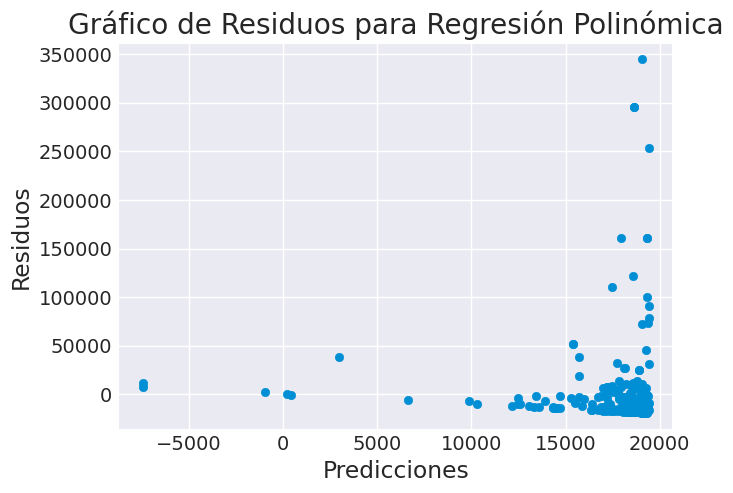

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo de regresión polinómica
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Hacer predicciones
y_pred_poly = polyreg.predict(X_test)

# Visualizar el gráfico de residuos
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Polinómica')
plt.show()

**Hipotesis 3**
Si la positividad del comentario aumenta, entonces la puntuación asociada también aumentará.

Error Cuadrático Medio en el conjunto de prueba: 0.07710771705907651


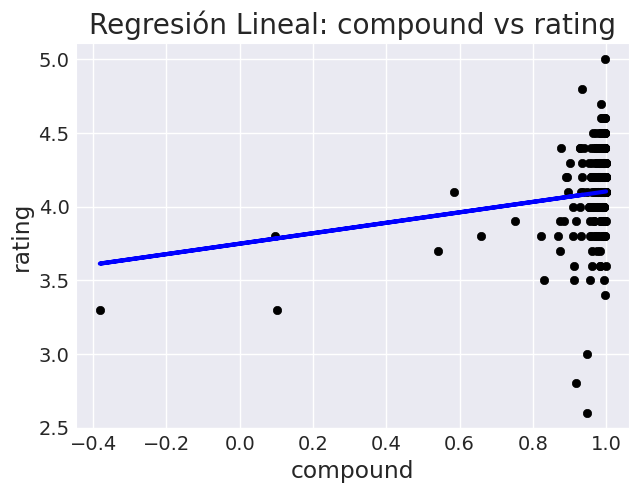

In [ ]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supongamos que df es tu DataFrame con los datos desde BigQuery
# Puedes cargar los datos de BigQuery a un DataFrame así:
# df = pd.read_gbq("SELECT * FROM tu_tabla", project_id="tu_proyecto")

# Seleccionar las variables de interés
df7 = df3[['compound', 'rating']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df7[['compound']]
y = df7['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio en el conjunto de prueba: {mse}")

# Visualizar los resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('compound')
plt.ylabel('rating')
plt.title('Regresión Lineal: compound vs rating')
plt.show()

Intersección (Intercept): 3.749118074858385. Este valor indica la puntuación estimada cuando el valor de compound es cero. En este contexto, se esperaría que la puntuación sea aproximadamente 3.75 cuando el sentimiento (compound) es neutral.

Pendiente (Slope o Coeficiente): 0.3546753426186704. Este valor indica el cambio esperado en la puntuación por cada unidad de cambio en compound. En este caso, significa que se espera un aumento promedio de alrededor de 0.35 en la puntuación por cada cambio unitario en el valor de compound.

La puntuación estimada cuando el sentimiento es neutral (compound es cero) es de aproximadamente 3.75.

Por cada cambio unitario en el valor de compound, se espera un aumento promedio de alrededor de 0.35 en la puntuación.

In [ ]:
# Obtener los coeficientes del modelo
coefficients = model.coef_

# Imprimir los coeficientes
print(f"Coeficiente: {coefficients[0]}")

# También puedes imprimir la intersección y la pendiente
print(f"Intersección: {model.intercept_}")
print(f"Pendiente: {model.coef_[0]}")

Coeficiente: 0.3546753426186704
Intersección: 3.749118074858385
Pendiente: 0.3546753426186704


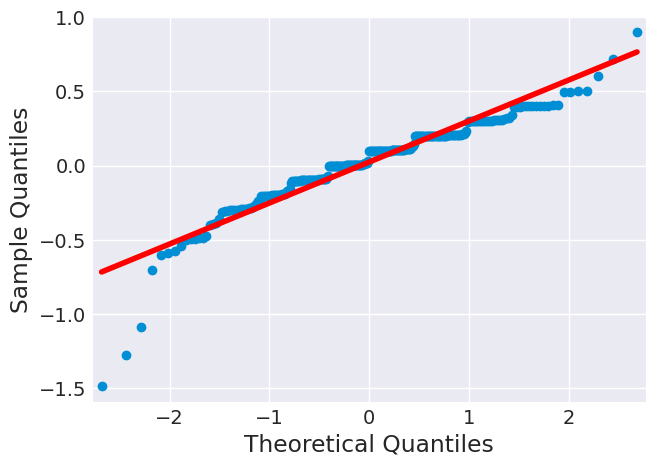

In [ ]:
#indica la normalidad de los residuos
#gráfico Q-Q (Quantile-Quantile) plot compara la distribución de los residuos con la distribución teórica normal
residuals = y_test - y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.show()

El siguiente grafico confirma que nuestros datos son lineales

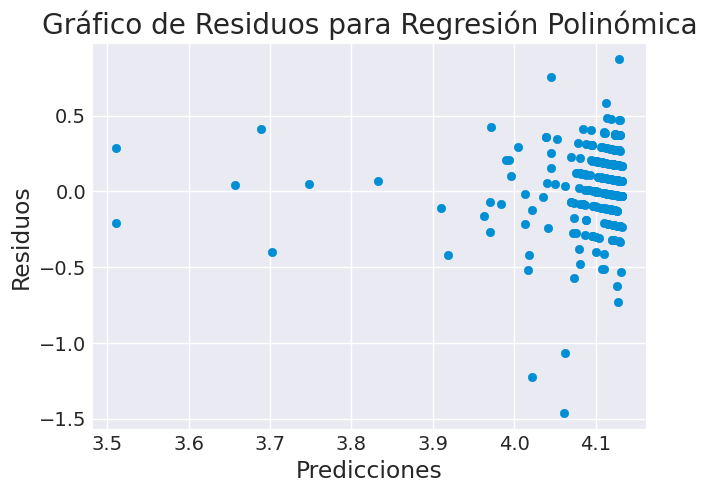

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Crear y ajustar el modelo de regresión polinómica
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Hacer predicciones
y_pred_poly = polyreg.predict(X_test)

# Visualizar el gráfico de residuos
residuals_poly = y_test - y_pred_poly
plt.scatter(y_pred_poly, residuals_poly)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para Regresión Polinómica')
plt.show()

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Autenticación con Google Cloud
auth.authenticate_user()

# Configuración del cliente de BigQuery
project_id = 'amzon-411119'  # Reemplaza con tu ID de proyecto
client = bigquery.Client(project=project_id)

# Reemplaza 'nombre_de_tabla' con el nombre que deseas para la tabla en BigQuery
table_id = 'amzon-411119.pruebas.tabla_general'

# DataFrame que deseas exportar (reemplaza esto con tu propio DataFrame)
# Puedes cargar tu DataFrame directamente en lugar de crear uno de ejemplo
# Asumiendo que tu DataFrame se llama 'tu_dataframe_real'
df = df3  # Reemplaza 'tu_dataframe_real' con tu DataFrame real

# Exportar DataFrame a BigQuery
job_config = bigquery.LoadJobConfig(write_disposition="WRITE_TRUNCATE")
job = client.load_table_from_dataframe(df, table_id, job_config=job_config)
job.result()  # Espera a que se complete el trabajo

print(f"DataFrame exportado a BigQuery: {table_id}")

DataFrame exportado a BigQuery: amzon-411119.pruebas.tabla_general


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1351 entries, 0 to 1350
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            1351 non-null   object 
 1   product_name          1351 non-null   object 
 2   category              1351 non-null   object 
 3   sub_category          1351 non-null   object 
 4   discounted_price      1351 non-null   float64
 5   actual_price          1351 non-null   float64
 6   discount_percentage   1351 non-null   float64
 7   about_product         1351 non-null   object 
 8   user_id               1351 non-null   object 
 9   user_name             1351 non-null   object 
 10  review_id             1351 non-null   object 
 11  review_title          1351 non-null   object 
 12  review_content        1351 non-null   object 
 13  img_link              1351 non-null   Int64  
 14  product_link          1351 non-null   Int64  
 15  rating               